# Thomas Fire Analysis in Santa Barbabra, CA
 
### By: Kristina Glass

Link to GitHub Repository: https://github.com/kristinaglass/thomas_fire_analysis

# About

## Purpose

The purpose of this dataset is to explore the impacts of the Thomas Fire in Santa Barbara from December 4, 2017 – March 22, 2018. This dataset explore landcover imagry and air quality

## Highlights of Analysis

- 1.3 - Data Analysis
- 1.4 - Plot AQI Data
- 2.3 - Data Analysis
- 2.4 - Plot Landsat Data

## Dataset Description and References

The datasets used include:
- [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov)
- A simplified Landsat raster collected by the Landsat 8 satellite 
- [A shapefile of fire perimeters in California during 2017 from the CA State Geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about)
- [A subset of the US Census Bureau's 2016 TIGER database state boundary](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)
- And various  datasets included in a 'data' folder


# Geographical Context of Data

In December 4, 2017, a fire was reported in Northern Santa Barbara County. Soon dubbed the Thomas Fire, the fire quickly spread across Ventura and Santa Barbara Counties, becoming one of the largest wildfires in California history. The fire burned through January of 2018, petering out naturally after containment of the majority of the fire was acheived. The fire burned approximatley 281,893 acres, caused over $2.2 billion USD in damages, and caused a total of two casualties directly. 

The Thomas Fire had great impacts on air quality and in its aftermath in 2018, the damage to the landscape exasturbated mudslides caused by a sudden winter storm. 

# References

US Environmental Protection Agency. Air Quality Index (AQI) [Data Set]. Retrieved from https://www.epa.gov/data

California State Geoportal (2023). California 2017 Fire Perimeters [Data File]. Retrieved from https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about

California Open Data Portal (2019). California State Boundary [Data File]. Retrieved from https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b

Thomas Fire (2023, December 813. In Wikipedia. https://en.wikipedia.org/wiki/Thomas_Fire

# Importing Data

In [1]:
#import necessary datastes
import pandas as pd
import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


## 1. Exploring Air Quality Index (AQI)

### 1.1 Read in AQI Datasets

In [2]:
#read in 2017 and 2018 daily aqi by county
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

### 1.2 Data Exploration

In [3]:
#view number of objects in aqi_17
len(aqi_17)

#view type of aqi_18
type(aqi_18)

pandas.core.frame.DataFrame

### 1.3 Data Analysis

This section allows us to simplify and modify the combined datasets (2017-2018) to plot only the necessary information. Setting the index as "date" is necessary to allow us to plot the AQI over time. We find the rolling average over 5 days to compare against normal AQI measures

In [4]:
#combine both datasets
aqi = pd.concat([aqi_17, aqi_18])

# re-assign the column names
aqi.columns = aqi.columns.str.lower()

#  re-assign the column names again
aqi.columns = aqi.columns.str.replace(' ','_')

In [5]:
#subset Santa Barbara County from data frame
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]
#check new dataframe
aqi_sb
#remove state_name, county_name, state_code, and county_code
aqi_sb = aqi_sb.drop(columns=["state_name", "county_name", "state_code", "county_code"])

#updating date column to datetime from object
aqi_sb.date = pd.to_datetime(aqi_sb.date)
#update index
aqi_sb = aqi_sb.set_index("date")

# calculate average over a rolling window
# 5D indicates the window will be over 5 days
aqi_sb.aqi.rolling('5D').mean()
# adding five day average column
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

### 1.4 Plot AQI Data

This plot helps us to visualize the impacts of the Thomas fire on AQI in Santa Barbara County, showing the spike in AQI durring the Thomas Fire

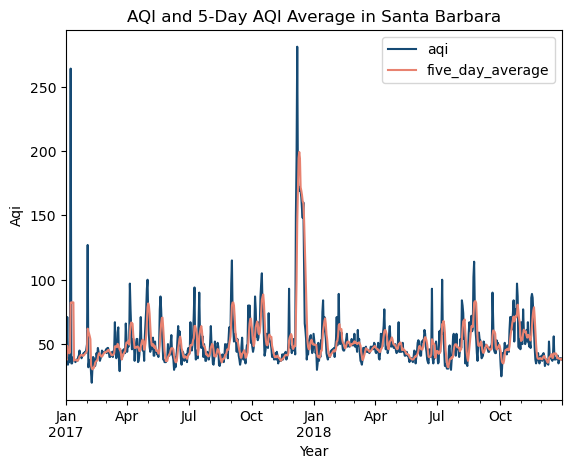

In [6]:
#Plotting AQI and 5 Day Average
#Leave x input blank to plot over the index (date index)
aqi_sb.plot( 
        y= ['aqi', 'five_day_average'], #allows for aqi and 5-day-average to be on same plot
        title = 'AQI and 5-Day AQI Average in Santa Barbara',
        xlabel='Year',
        ylabel='Aqi',        
        color = {'aqi':'#154a74',
                 'five_day_average': '#e88270'
                 }
        )

plt.show
plt.savefig('images/aqiplot.png')

## 2. Exploring Landsat 8 False Color Image

### 2.1 Read in Landsat and Fire Permimeter Datasets

In [7]:
# set landsat data file path
landsat_fp = os.path.join(os.getcwd(), 'data', 'landsat8-2018-01-26-sb-simplified.nc')
#import landsat data
landsat = rioxr.open_rasterio(landsat_fp)

# import fire perimeters as ca_fire
ca_fire = gpd.read_file('data/California_Fire_Perimeters_2017/California_Fire_Perimeters_2017.shp')

### 2.2 Data Exploration

In [8]:
#show dataset type of landsat
type(landsat)
#show landsat values
landsat.values
#show landsat crs
landsat.rio.crs

#find type of ca_fire dataset
type(ca_fire)
#check values of ca_fire
ca_fire.values
#show ca_fire crs
ca_fire.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 2.3 Data Analysis

This portion of the analysis allows us to match the crs's of the datasets so they can be plotted together, as well as simplifying our datasets to make them easier to plot

In [9]:
# transform ca_fire crs
ca_fire.to_crs(crs = 32611, inplace = True)

#subset ca_fire to Thomas Fire data, create new variable "thomas"
thomas = ca_fire[ca_fire['FIRE_NAME']=="THOMAS"]

#remove unecessary band "band" from landsat dataset
landsat = landsat.squeeze().drop('band')

### 2.4 Plot Landsat Data

This plot allws us to see the boundaries of the Thomas Fire within Santa Barbara County to understand the fire's area of impact

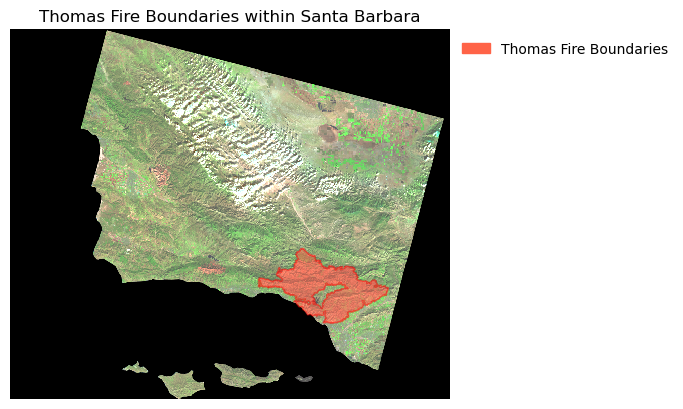

In [10]:
#create plot
fig, ax = plt.subplots()
# --------------------------------------------
# create landsat false color image with necessary color bands
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
# --------------------------------------------
#create thomas fire area boundaries
thomas.plot(ax=ax, color = 'tomato', alpha = 0.5, edgecolor = "red")
#create thomas fire legend patch
thomas_patch = mpatches.Patch(color='tomato',
                          label='Thomas Fire Boundaries')
# --------------------------------------------
# create plot legend
ax.legend(handles = [thomas_patch], frameon=False, loc='upper left', bbox_to_anchor = (1,1))
#set plot tile
ax.set_title('Thomas Fire Boundaries within Santa Barbara')
#remove axis
ax.set_axis_off()
#show plot
plt.show()

fig.savefig('images/thomasfirebound.png')